# **Project Name**  - **Play store app review analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual(Ankita Gupta)

## **Project Summary**###

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

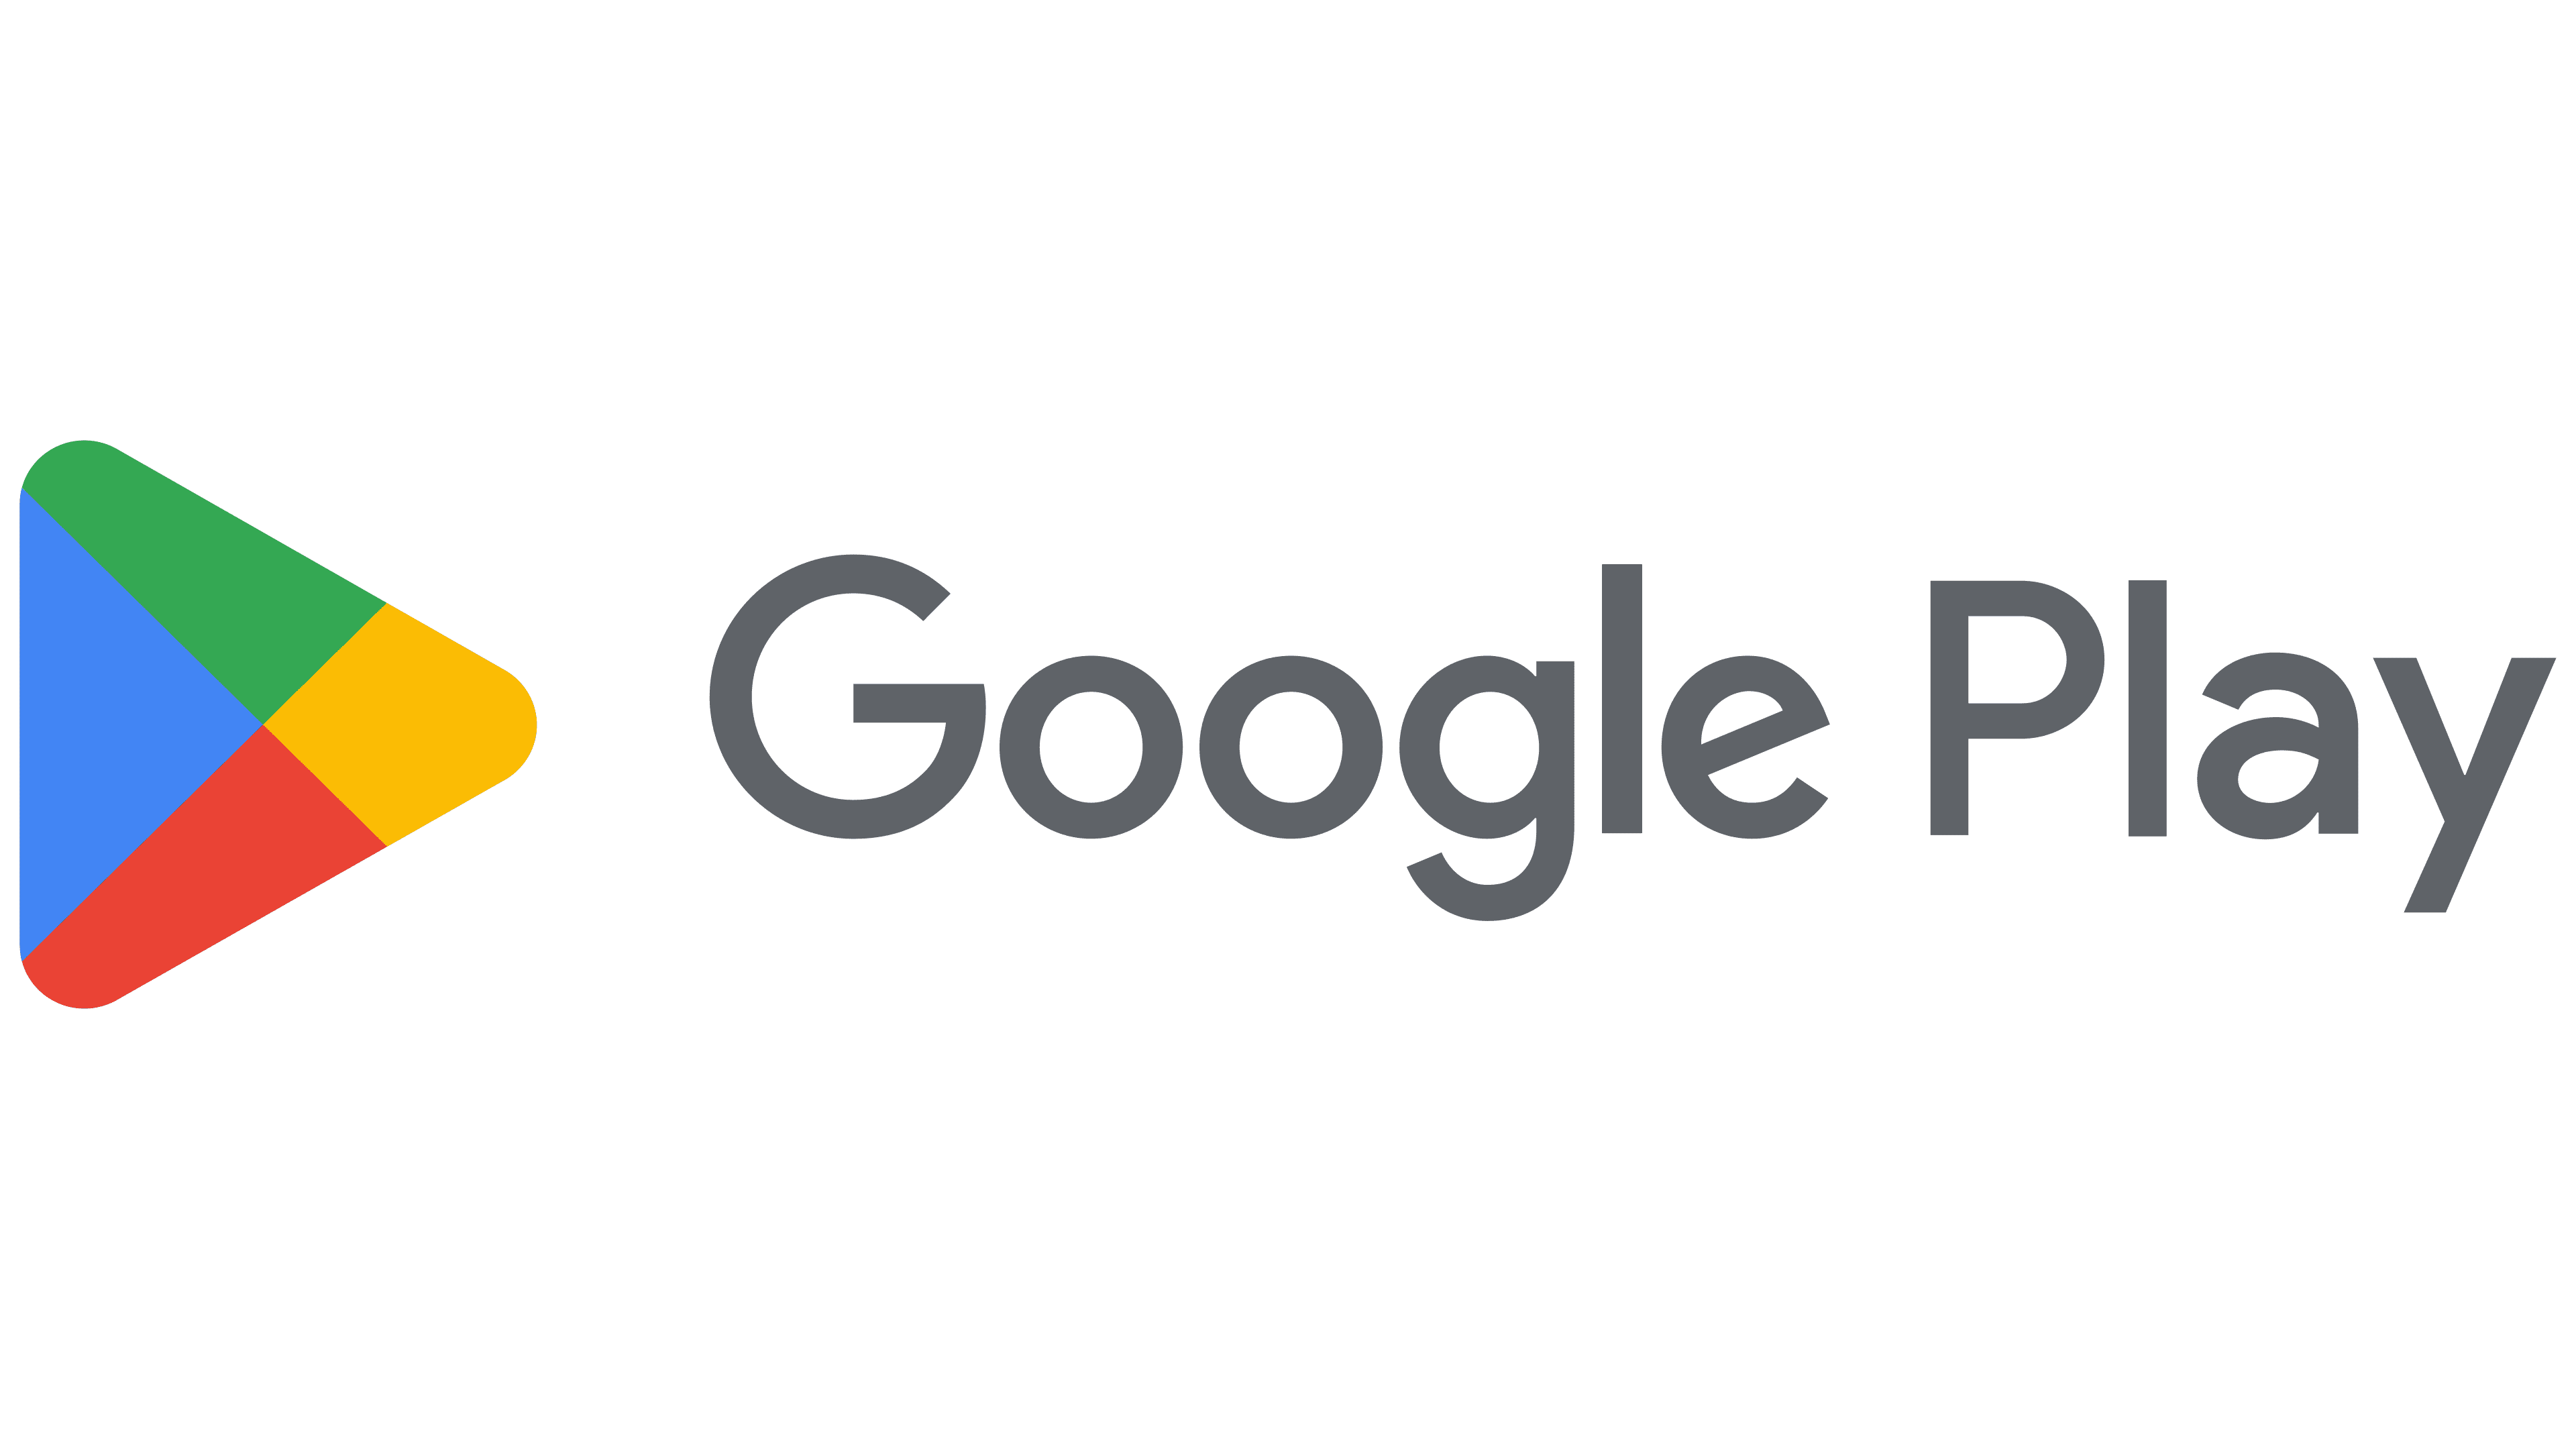

# **GitHub Link -**

https://github.com/ankitagupta010/Play_store_app_review_analysis

#Google Play Store Apps Exploratory Data Analysis (EDA)

Google Play, also branded as the Google Play Store and formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system and its derivatives as well as ChromeOS, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play has also served as a digital media store, offering music, books, movies, and television programs. Content that has been purchased on Google Play Movies & TV and Google Play Books can be accessed on a web browser, and through the Android and iOS apps.

In the given EDA we try to understand and evaluate Google Play Store Data that has been provided by studying various heads like 'Application', 'Type', 'Installs, 'Rating', etc. By going through the data, doing necessary manipulations and understanding, we'll try to come up with the answers for various questions.

# Importing Required Libraries

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# allow matplotlib to plot inline

Importing all the necessary libraries to process and work on the databases.



# DATA

The datasets consist of two CSV files which are play store data.csv and user reviews.csv.

The play store data.csv has 10,841 observations and 13 variables about details of the applications on Google Play.

The user reviews.csv has 64,295 observations and 5 variables about the most relevant 100 reviews for each app and sentiment informations for each review.

The variables of each dataset are as below:

[Google Play Store App Datasets]

**Play store data.csv**

*   App: Application name

*   Rating: Overall user rating of the app


*   Reviews: Number of user reviews for the app

*   Size: Size of the app

*   Price: Price of the app
*   Installs: Number of user downloads/installs for the app
*   Type: Paid or Free

*  Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
*   Genres: An app can belong to multiple genres (apart from its main category)


**User reviews.csv**


*  Genres: An app can belong to multiple genres (apart from its main category)

*  App: Name of app


*  Translated_Review: User review (Preprocessed and translated to English)


*  Sentiment: Positive/Negative/Neutral (Preprocessed)


* Sentiment_Polarity: Sentiment polarity score (>0 - positive, <0 - nagative)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#accessing/reading the dataset
df_path='/content/Play Store Data.csv'
review_path='/content/User Reviews.csv'

In [4]:
playstore_df=pd.read_csv(df_path)

In [5]:
review_df=pd.read_csv(review_path)

* Read the googleplaystore.csv data file of play store dataframe and saved the dataset into a data frame called playstoredf.

* Checked the important information of the dataset using .describe() function.

* Checked the information of the dataset using .info() function.

* Checked the contents of the dataset using .head() function.

---



In [6]:
playstore_df.describe(include="all")


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
playstore_df.shape

(10841, 13)

In [8]:
#studying the dataframe's observations, variables and their datatypes
#finding out first which columns have null values
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
playstore_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


* Read the userreview.csv data file of play store dataframe and saved the dataset into a data frame called reviewdf.

* Checked the important information of the dataset using .describe() function.

* Checked the information of the dataset using .info() function.

* Checked the contents of the dataset using .head() function.

In [10]:
#getting all te various values
review_df.describe(include="all")

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [11]:
#getting the review of the data
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [12]:
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


#Scanning and Cleaning Data:
Scaning and Removing missing values To scan the data for missing values, special values and obvious errors, the next steps has been applied.

*Scan the data for missing values using .is.na().sum() function.
As the result, the Rating variable has 1474 NAs and Translated_Review variable has 3881 NAs, Type and Content rating has 1 na each, current ver has 8 Nas,android ver has 3 Nas,Sentiment_Subjectivity and Sentiment_Polarity has 3880 each.
* Removing NAs from PlayStore Dataframe
* Replace the NAs of Rating to the mean value of Rating values.
* Remove the NAs of Tranlated_Review using dropna() funtion.

In [13]:
#removing all the null values
playstore_df.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [14]:
playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [15]:
playstore_df['Rating']=playstore_df['Rating'].fillna(playstore_df['Rating'].mean())

**Drop duplicate Applications**

Dropping duplicate applications from 'App' by using drop_duplicates function.



In [16]:
playstore_df.drop_duplicates(subset=['App'], inplace=True)

#Cleaning Data:
**'Install' Data Cleaning**

Cleaning the "Installs" column by converting the numerical values. Converting install counts to numerical values by removing 'Free' value, "+" and ',' signs from dataframe.

In [17]:
#printing all the unique values of "Installs" head
playstore_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

**Converting install counts to numerical values by removing 'Free' value, "+" and ',' signs from dataframe.**


In [18]:
#Removing "free" , "+" and "," values from data
installs_list = [i for i in playstore_df['Installs']]
install_count = []
for install in installs_list:
    if 'Free'== install:
        install='0'
    if '0'==install:
        install='0'
    if ',' in install:
        install = install.replace(',', '')
    if '+' in install:
        install = install.replace('+', '')
    install = int(install)
    install_count.append(install)

playstore_df['Installs_Count'] = install_count
playstore_df['Installs_Count'] = playstore_df['Installs_Count'].astype(float)


**Review Column Data Cleaning**

Cleaning the "Review" data and changing type "object" to "float".

In [19]:
#changing 'review' data and type from "object to "float
reviews_list = [i for i in playstore_df['Reviews']]


cleaned_data = []
for review in reviews_list:
    if 'M' in review:
        review = review.replace('M', '')
        review = float(review) * 1000000  # 1M = 1,000,000
    cleaned_data.append(review)

playstore_df['Clean_Reviews'] = cleaned_data
playstore_df['Clean_Reviews'] =playstore_df['Clean_Reviews'].astype(float)

**Price Coulmn Data Cleaning**

Cleaning the 'Price' data and changing the "$" and "Everyone" to " " and "0" respectively.



In [20]:
#cleaning the price data and changing"$" and "everyone" to "" and "0"
prices_list = [i for i in playstore_df['Price']]

cleaned_data = []
for price in prices_list:
    if '$' in price:
      price = price.replace('$', '')
    if price=='Everyone':
      price='0'
    cleaned_data.append(price)

playstore_df['Price_Updated'] = cleaned_data
playstore_df['Price_Updated'] = playstore_df['Price_Updated'].astype(float)


#Pie Chart showing distribution of various application category
* Firstly taking out all the categories of various apps on PlayStore and finding the total sum of those respective categories.
* Using groupby function to convert "Category" into a dataframe.
* Using matplotlib to plot pie chart out of the given information by using specific radius of 4, showing percentage distribution.

Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK',
       'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', name='Category')
[64, 85, 53, 222, 420, 56, 315, 171, 119, 102, 64, 1832, 345, 112, 959, 288, 74, 84, 369, 131, 395, 254, 60, 376, 281, 374, 202, 239, 325, 827, 219, 163, 79]


<function matplotlib.pyplot.show(close=None, block=None)>

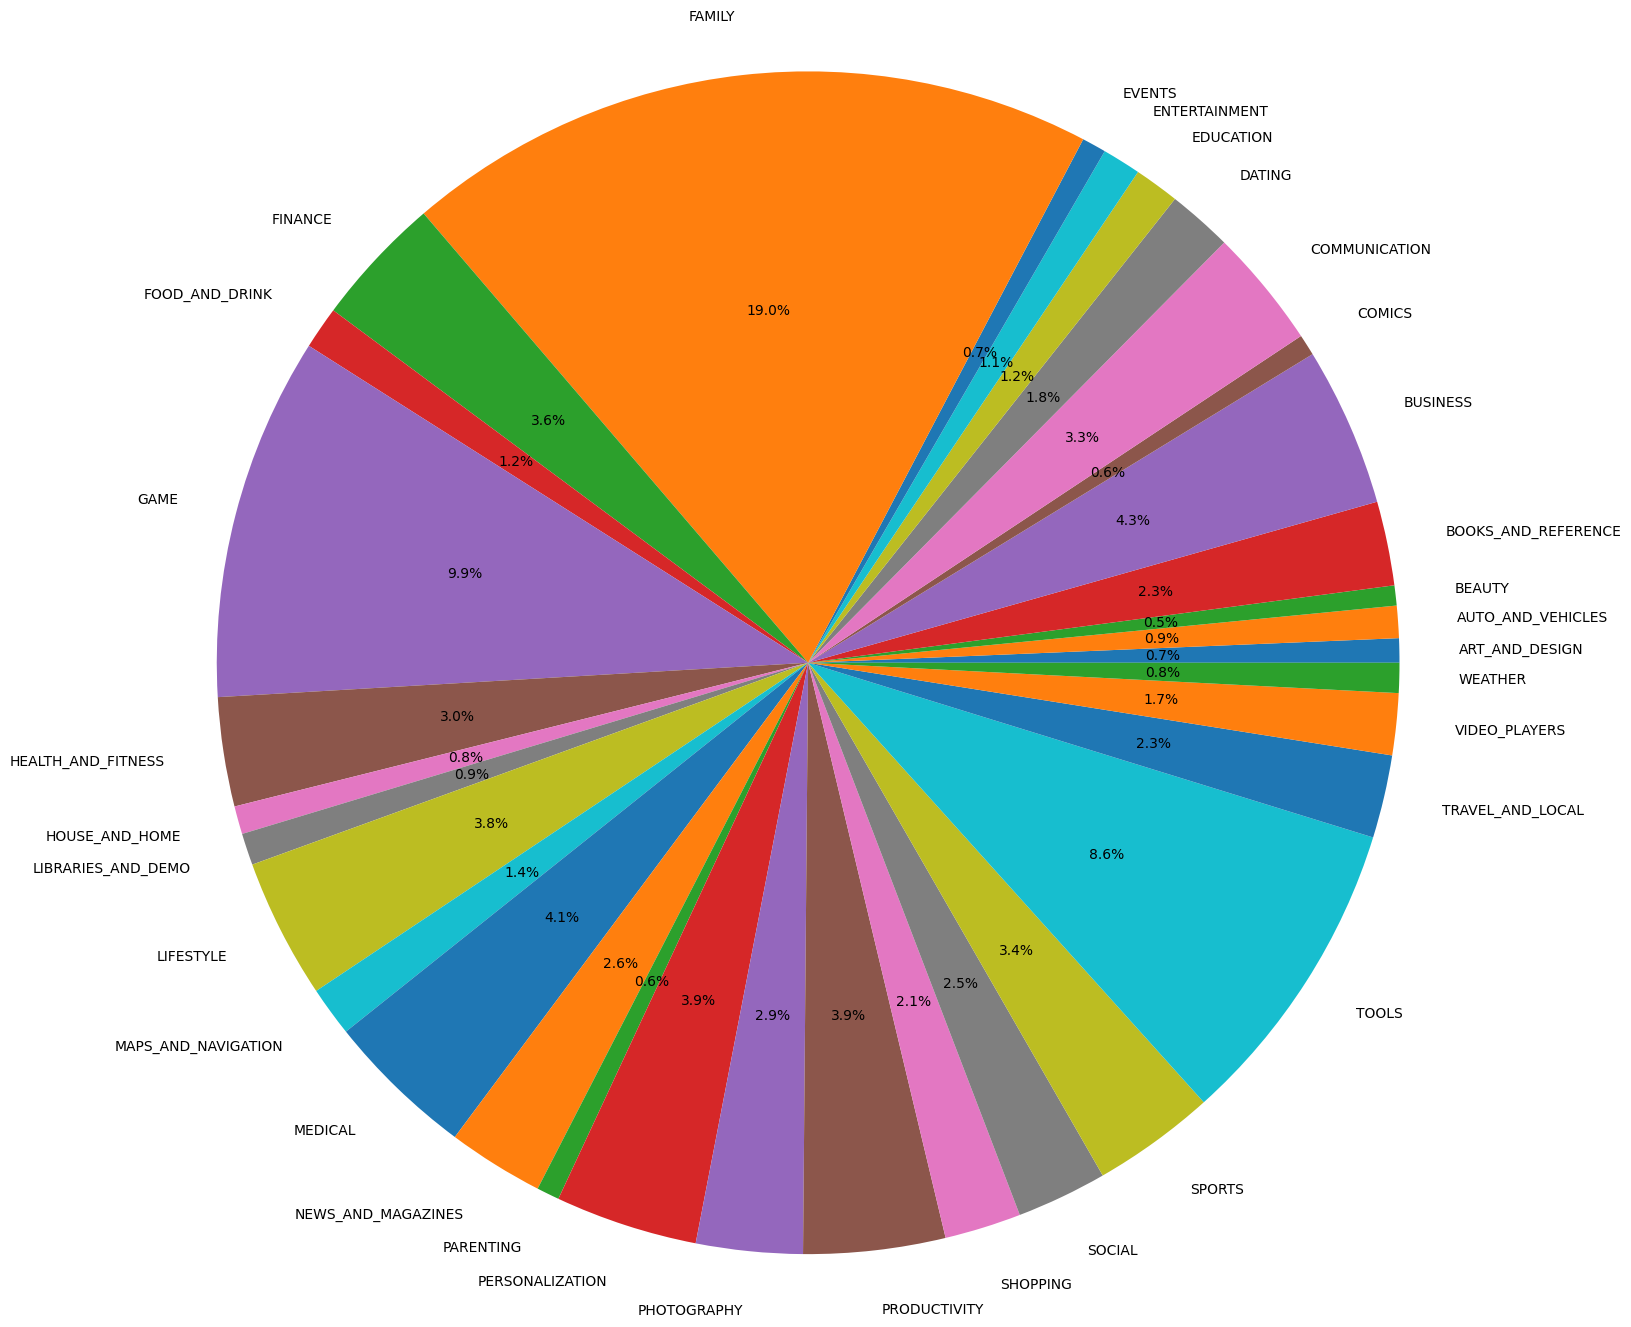

In [21]:
#using groupby funtion to convert category into dataframe
categorydf= playstore_df.groupby(['Category'])['Category'].count()
categorydf
#plotting various categories into piechart
labels=categorydf.index[1:]
print(labels)
values=categorydf.tolist()[1:]
print(values)
plt.pie(values, labels =labels, radius=4,autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.show

#Number of Applications for Each Category
Plotting the number of Applications that are in each Category.

Using matplotlib to plot BarGraph of various categories' count.
Specifying the figure size, giving title labels.

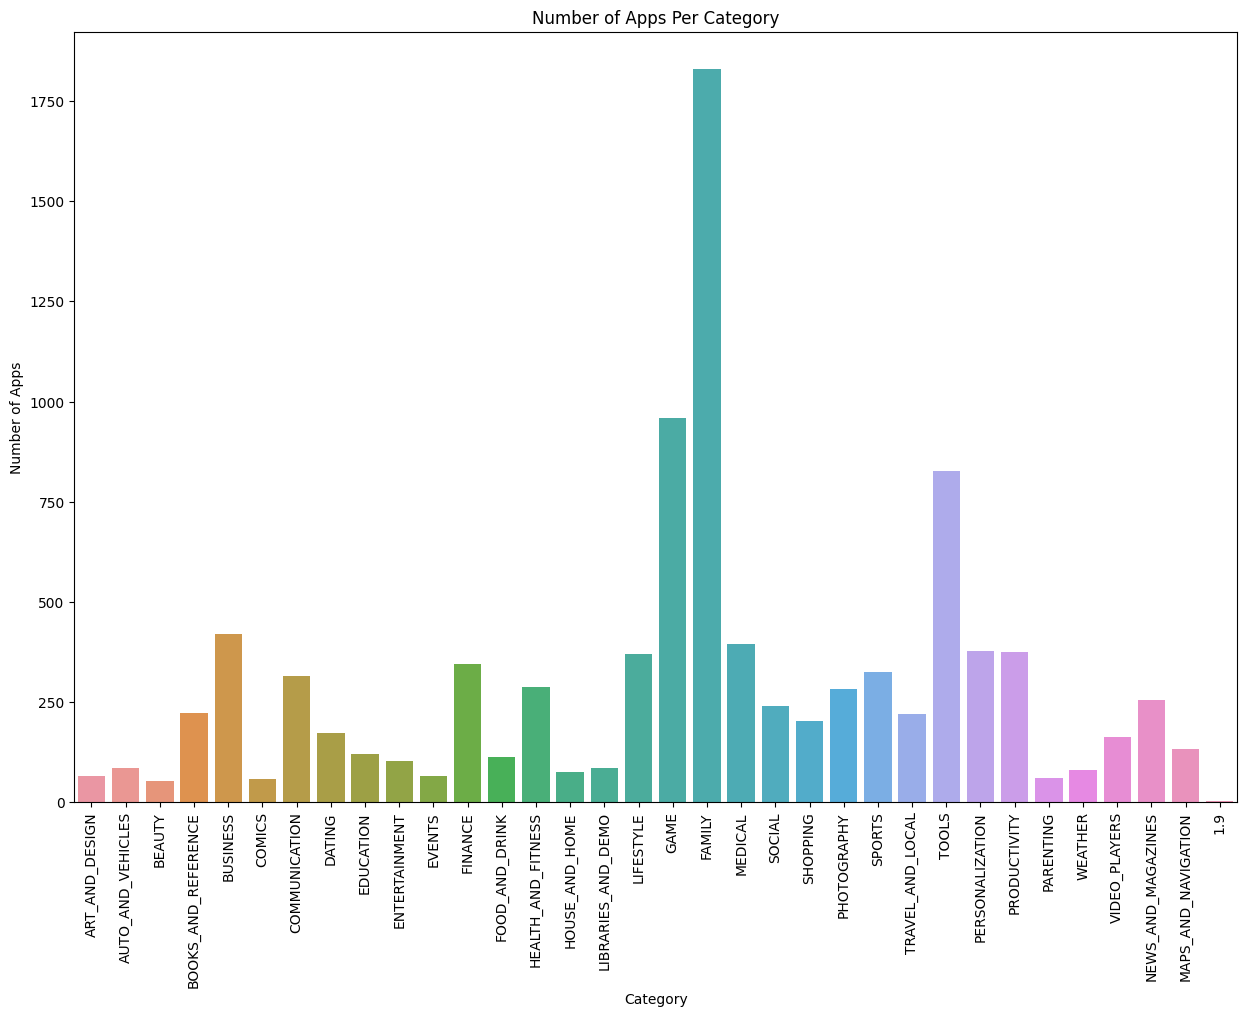

In [22]:
#plotting the number of applications of each category as bar graph
plt.figure(figsize=(15,10))
sns.countplot(x='Category', data=playstore_df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

Family, Games and tools are the top 3 most installed apps as we can infer from the graph plotted.

#Paid and Free Application percentage distribution:
Applications on the playstore are of two types:
* Paid
* Unpaid

Plotting a piechart showing the percentage distribution of both paid and unpaid applications:
* Again used groupby function to count the type of applications and take out the sum of the same.
* Plotted a pie chart of radius 2.2 with percentage specification.



Index(['Free', 'Paid'], dtype='object', name='Type')


<function matplotlib.pyplot.show(close=None, block=None)>

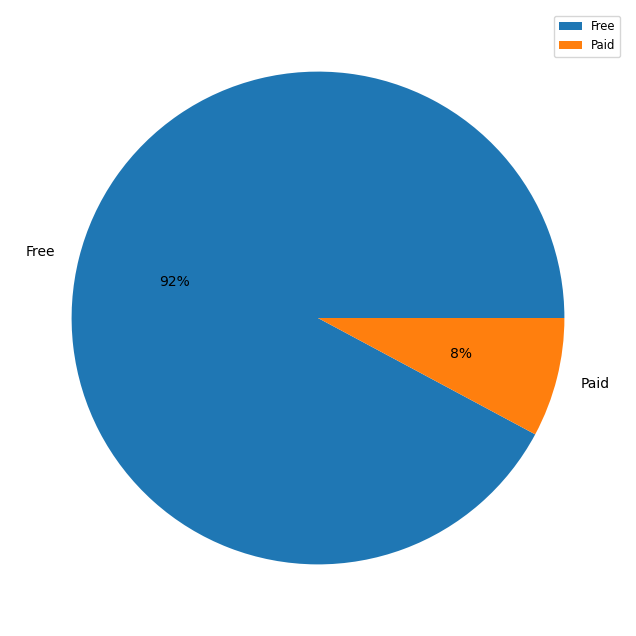

In [23]:
#using broupby function to change the type
categorydf= playstore_df.groupby(['Type'])['Type'].count()
categorydf
labels=categorydf.index[1:]
print(labels)
values=categorydf.tolist()[1:]
#plotting the % distribution of both free and paid apps in pie chart
plt.figure(figsize=(15,8))
plt.pie(values, labels =labels,autopct='%1.0f%%')
plt.legend(loc='upper right', fontsize='small')
plt.show

From the above pie chart, we can conclude that most of the apps on google play store are free(Approx 92%).


#Application Type Distribution
Plotting the application type distribution using bar graphs to show the Number of Paid and Free applications in total categories.

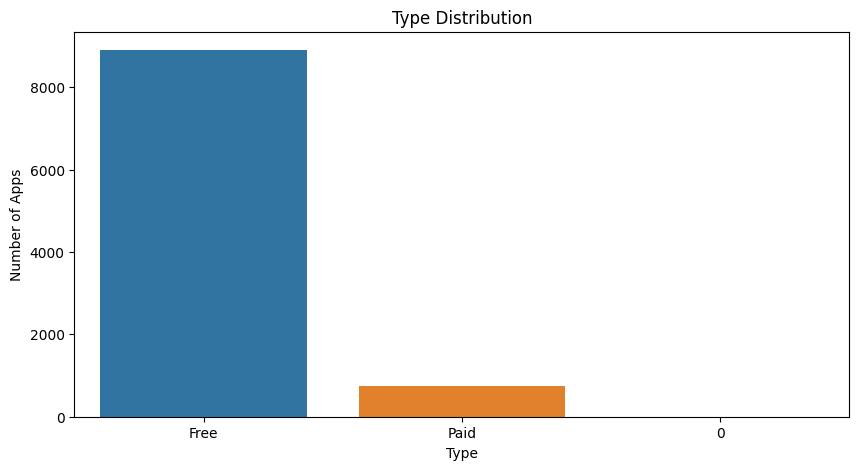

In [24]:
#plotting bar graph showing number of applications and their distribtion based on the type(paid/free)

plt.figure(figsize=(10, 5))
sns.countplot(x='Type',data=playstore_df)
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

Free has more than 8000 no. of apps category wise as compared to paid type.

##Comparison between sentiment factors.##

In [25]:
review_df.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1324,8 Ball Pool,NaN,NaN,NaN,NaN
54402,Goldstar: Live Event Tickets,Awesome app!,Positive,1.0,1.0
54978,Google Allo,NaN,NaN,NaN,NaN
6524,Amazon Prime Video,NaN,NaN,NaN,NaN
15341,"Bleacher Report: sports news, scores, & highli...",NaN,NaN,NaN,NaN


In [26]:
review_df.shape

(64295, 5)

In [27]:
#finding duplicate values
review_df.duplicated().sum()

33616

### **Cleaning for User reviews data set**

In [28]:
#Dropping duplicate values
review_df=review_df.drop_duplicates()

In [29]:
#Rechecking to verify if duplicate values are removed
review_df.duplicated().sum()

0

 **so, now we have removed all duplicate values from user review data set, let's proceed to deal with null values.**

In [30]:
#Dropped all null values.
review_df= review_df.dropna()

In [31]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [32]:
playstore_df.shape,review_df.shape

((9660, 16), (29692, 5))

###**Sentiment polarity and Sentiment subjectivity analysis**###
###There are 4 features which gives the information about user engagement with the andriod apps in the play store.###

Here there is data about the translated reviews given by the users, Sentiment polarity, Sentiment subjectivity and Sentiment for a given app.

Polarity is float which lies in the range of [-1,1] where value is near to 1 means positive statement and values near to -1 means a negative statement.

Subjectivity is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual.

For example, if subjectivity value is near to 1 means its a public opinion and if its near to 0 means its a factual data.

Sentiment finally gives whether it is positive, negative or neutral statement/reviews for a given app.

In [33]:
review_df['Sentiment'].value_counts()

Positive    19015
Negative     6321
Neutral      4356
Name: Sentiment, dtype: int64

Text(0, 0.5, 'sentiment')

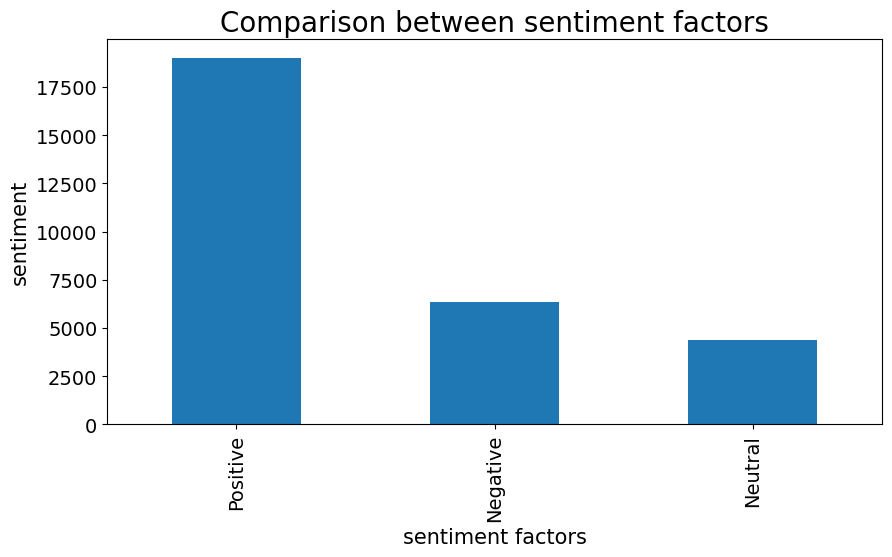

In [34]:
ax = review_df['Sentiment'].value_counts().plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
ax.set_title("Comparison between sentiment factors", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("sentiment factors", fontsize = 15)
ax.set_ylabel("sentiment", fontsize = 15)

Showing percentage of sentiment factors using pie chart.

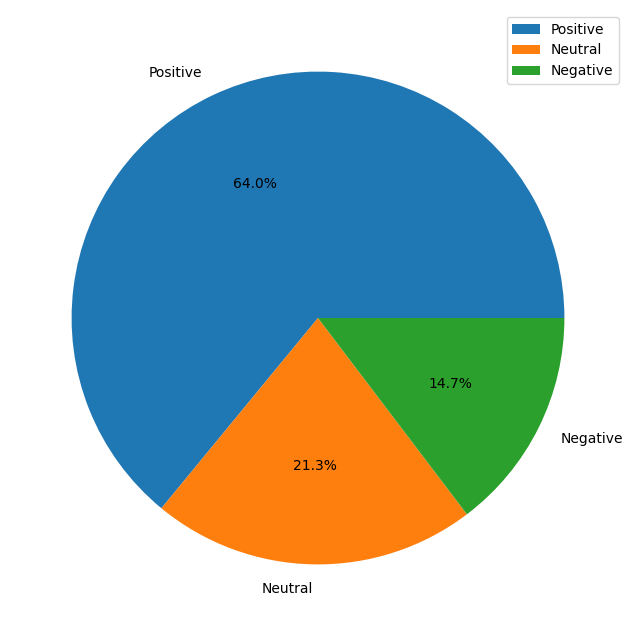

In [35]:
fig = plt.figure(figsize=(8, 8))
plt.pie(review_df['Sentiment'].value_counts(), labels = review_df['Sentiment'].unique(),autopct='%1.1f%%',)
plt.legend(loc='upper right')
plt.show()

From the above pie chart, we can say that most of the app on google play store have received positive reviws(64%) by the user, while some of the app have received negative reviews as well(approx 15%).

#Number of Installs For Each Category

Plotting the Number of Installs in Each category of apps using a bargraph representation by using the Install_Count dataframe, with figure size of 15,10.

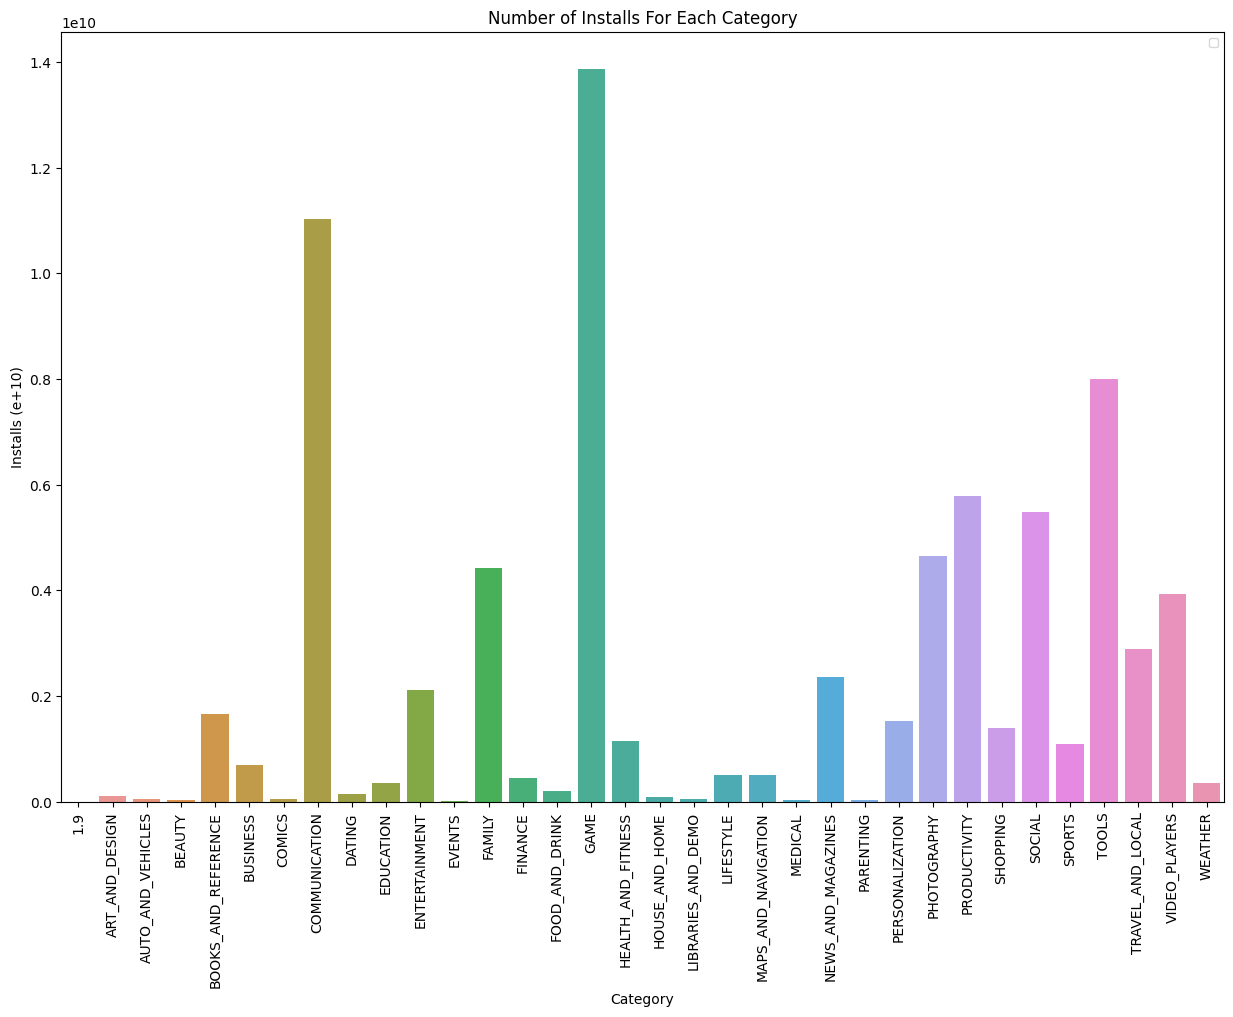

In [36]:
#finding the sum of total insatlls using .sum function
categories = playstore_df.groupby('Category')
category_installs_sum_df = categories[['Installs_Count']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  # to convert groupby object into dataframe

#plotting bar graph for number of installs for each category of apps
plt.figure(figsize=(15, 10))
sns.barplot(x='Category', y='Installs_Count', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.legend(loc='upper right', fontsize='small')
plt.show()

From this distribution plotting of number of installs for each category, we can see that most of the apps being downloaded and installed are from the categories of 'Game' and 'Communication

#Relationship of Rating with Reviews, Installs and Price

<ipython-input-37-9c6aee541837>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating_df = playstore_df.groupby('Rating').sum().reset_index()


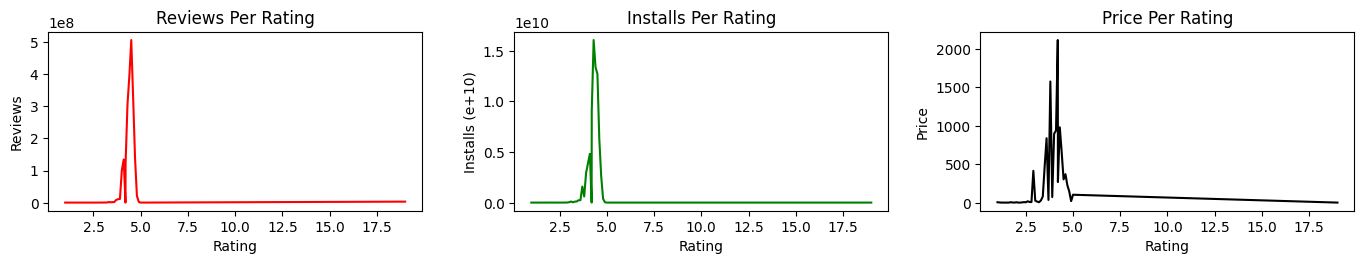

In [37]:
#finding the sum of ratings for apps
rating_df = playstore_df.groupby('Rating').sum().reset_index()

#plotting comparing graphs using the various info and finding corelation between reviews, install count and price with respect to rating
fig, axes = plt.subplots(1, 3, figsize=(14, 3))

axes[0].plot(rating_df['Rating'], rating_df['Clean_Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_df['Rating'], rating_df['Installs_Count'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Installs (e+10)')
axes[1].set_title('Installs Per Rating')

axes[2].plot(rating_df['Rating'], rating_df['Price_Updated'], 'k')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Price')
axes[2].set_title('Price Per Rating')

plt.tight_layout(pad=2)
plt.show()


From the above plottings, we can imply that most of the apps with higher rating range of 4.0 - 4.7 are having high amount of reviews and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.

In [38]:
#Let's find out the relation between content rating and app count!
abc = playstore_df['Content Rating'].value_counts().index
xyz = playstore_df['Content Rating'].value_counts()
#creating empty lists to append elements
abc_list = []
xyz_list = []
for i in range(len(abc)):
    abc_list.append(abc[i])
    xyz_list.append(xyz[i])

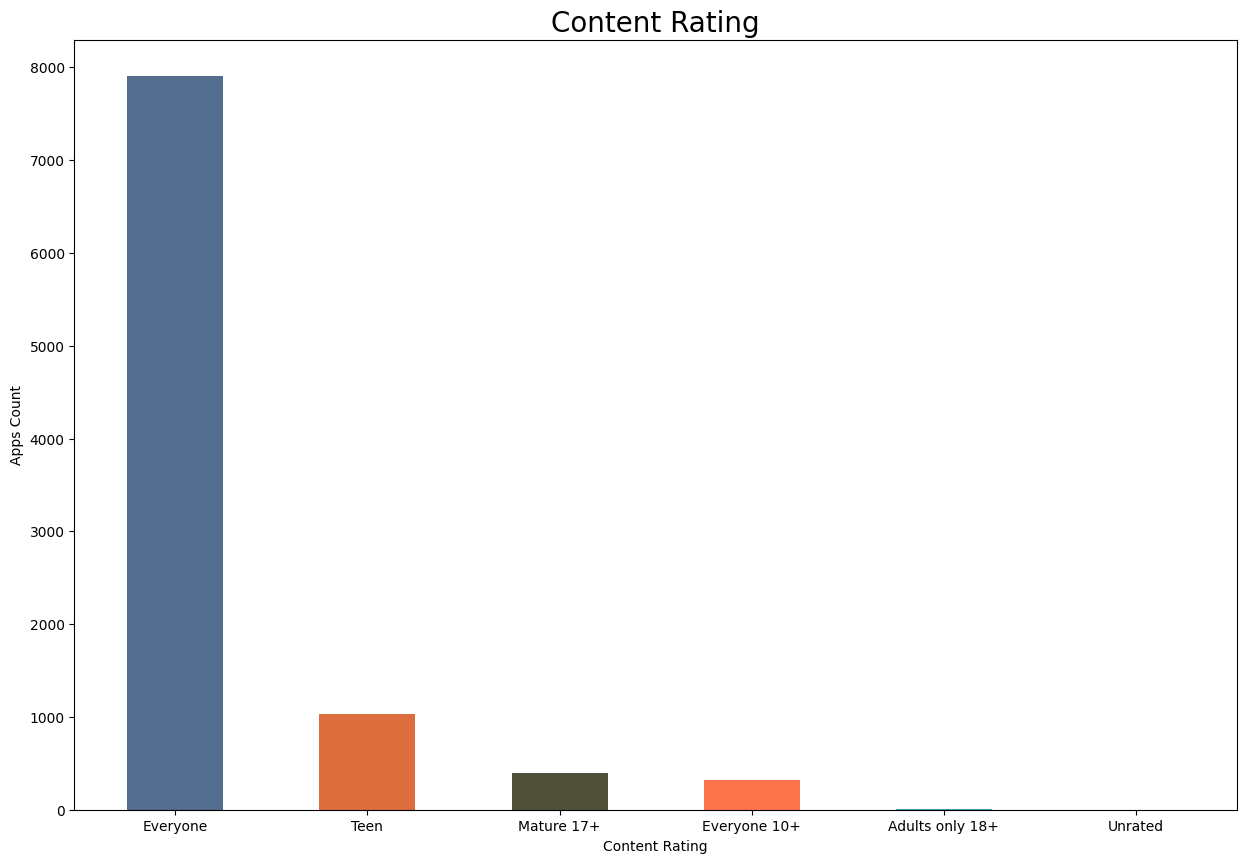

In [39]:
plt.figure(figsize=(15,10))
plt.bar(abc_list,xyz_list,width=0.5,color=['#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps Count');
plt.xlabel('Content Rating');

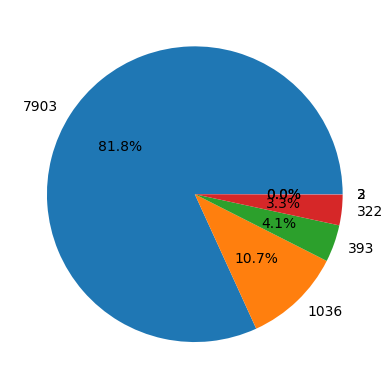

In [40]:
plt.pie(playstore_df['Content Rating'].value_counts(), labels = playstore_df['Content Rating'].value_counts().unique(),autopct='%1.1f%%',)
plt.show()

1.More than 80% of total apps are targetting audience in every age group and hence open for everyone.

2.Very few(less then 500 apps) are catering to only adult population i.e Mature 17+

#Correlation
Finding out the correlation between Rating, Install_Counts, Price_Updated and Clean Reviews by using .corr() function.
* Plotting the given dataframe of correlation using Seaborn .heatmap
* Modifying the figure size with respective values.

In [41]:
#plotting a corelation graph to find corelation between rating, price, reviews and installs
corr_df=playstore_df.corr()

<ipython-input-41-cc63f9ddc769>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=playstore_df.corr()


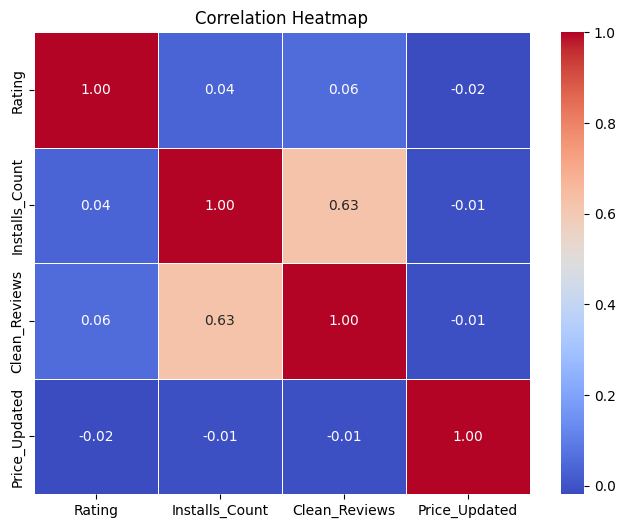

In [42]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


This Correlation shows that Install_counts and Clean_reviews have the highest level of correlation amongst these given heads.

#Questions and Observations

**What are the top 10 most installed applications?**

In [43]:
#checking the top 10 most installed applications
df = playstore_df.sort_values(by=['Installs_Count'], ascending=False)
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Count,Clean_Reviews,Price_Updated
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1.000000e+09,69119316.0,0.0
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,"1,000,000,000+",Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,1.000000e+09,1433233.0,0.0
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1.000000e+09,27722264.0,0.0
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,"1,000,000,000+",Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device,1.000000e+09,9235155.0,0.0
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,1.000000e+09,4604324.0,0.0
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1.000000e+09,66577313.0,0.0
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.000000e+09,78158306.0,0.0
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1.000000e+09,9642995.0,0.0
2554,Google+,SOCIAL,4.2,4831125,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 26, 2018",Varies with device,Varies with device,1.000000e+09,4831125.0,0.0
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,1.000000e+09,25655305.0,0.0


In [44]:
print(f'Top 10 most installed applications are :\n', ','.join(df['App'].head(10)))


Top 10 most installed applications are :
 WhatsApp Messenger,Google Play Books,Subway Surfers,Maps - Navigate & Explore,Gmail,Instagram,Facebook,Google Chrome: Fast & Secure,Google+,YouTube


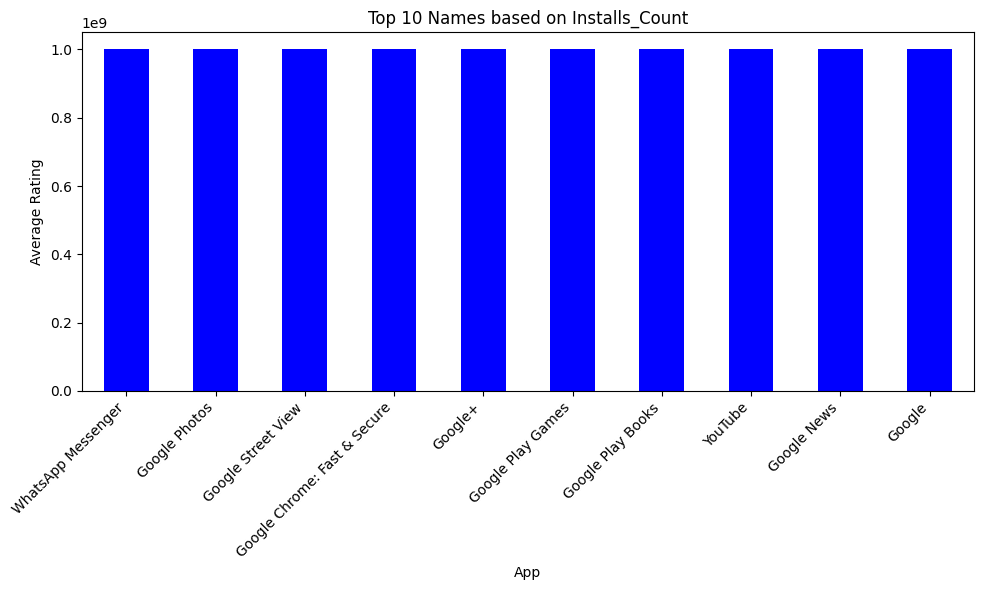

In [45]:
top_10_apps = df.groupby('App')['Installs_Count'].mean().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_apps.plot(kind='bar', color='blue')
plt.title('Top 10 Names based on Installs_Count')
plt.xlabel('App')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

**What are the top 10 Applications based on rating?**

In [46]:
#checking the top 10 applications based on ratings
best_reviewed_apps= playstore_df.sort_values(by=['Rating'], ascending=False)
best_reviewed_apps.head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Count,Clean_Reviews,Price_Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,0.0,3000000.0,0.0
6823,Barisal University App-BU Face,FAMILY,5.0,100,10M,"1,000+",Free,0,Everyone,Education,"May 6, 2018",3.1.1,4.0.3 and up,1000.0,100.0,0.0
9301,EF Academy,HEALTH_AND_FITNESS,5.0,4,15M,50+,Free,0,Everyone,Health & Fitness,"March 23, 2018",7.7.3,4.1 and up,50.0,4.0,0.0
7321,CG Jobs,FAMILY,5.0,8,14M,10+,Free,0,Everyone,Education,"August 1, 2018",1.1,4.2 and up,10.0,8.0,0.0
5852,Quran Khmer Offline AY,FAMILY,5.0,41,4.0M,"1,000+",Free,0,Everyone,Education,"December 13, 2017",10.6,4.2 and up,1000.0,41.0,0.0
5828,A-Y Collection,SHOPPING,5.0,2,2.9M,100+,Free,0,Teen,Shopping,"February 16, 2018",1.2,4.1 and up,100.0,2.0,0.0
5822,Flippy Axe : Flip The Knife & Axe Simulator,GAME,5.0,7,15M,100+,Free,0,Everyone,Arcade,"September 27, 2017",1.1,4.2 and up,100.0,7.0,0.0
5795,Axe Champs! Wars,GAME,5.0,8,25M,50+,Free,0,Everyone,Arcade,"June 26, 2018",1.1,4.1 and up,50.0,8.0,0.0
5776,Food-Aw - Order Food Online in Aruba,FOOD_AND_DRINK,5.0,1,24M,100+,Free,0,Everyone,Food & Drink,"April 5, 2018",10,4.1 and up,100.0,1.0,0.0
5763,Tozer Devotional -Series 1,BOOKS_AND_REFERENCE,5.0,5,4.3M,"1,000+",Free,0,Everyone,Books & Reference,"October 8, 2016",1.0,2.3 and up,1000.0,5.0,0.0


In [47]:
print(f'Top 10 highest rated applications are :\n', ','.join(best_reviewed_apps['App'].head(10)))

Top 10 highest rated applications are :
 Life Made WI-Fi Touchscreen Photo Frame,Barisal University App-BU Face,EF Academy,CG Jobs,Quran Khmer Offline AY,A-Y Collection,Flippy Axe : Flip The Knife & Axe Simulator,Axe Champs! Wars,Food-Aw - Order Food Online in Aruba,Tozer Devotional -Series 1


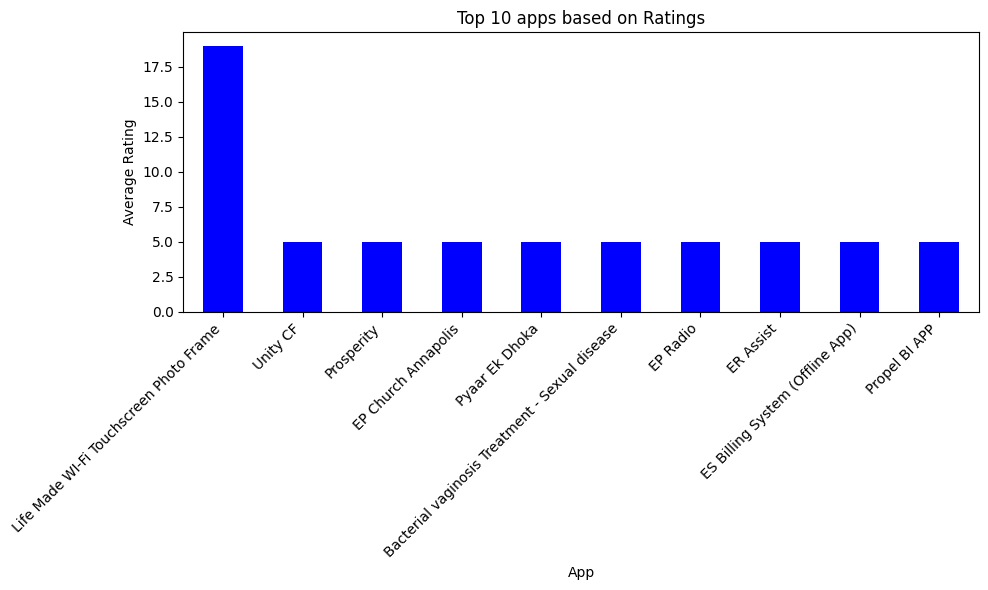

In [48]:
top_10_best_reviewed = df.groupby('App')['Rating'].mean().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_best_reviewed.plot(kind='bar', color='blue')
plt.title('Top 10 apps based on Ratings')
plt.xlabel('App')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

**What are the top 5 most downloaded applications that are paid?**

In [49]:
#sorting the apps based on paid type
df1 = playstore_df[playstore_df['Type'] == 'Paid']

#showing top 5 most installed "paid" apps
result1=df1.sort_values(by=['Installs_Count'], ascending=False)
result1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Count,Clean_Reviews,Price_Updated
4034,Hitman Sniper,GAME,4.600000,408292,29M,"10,000,000+",Paid,$0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,10000000.0,408292.0,0.99
2241,Minecraft,FAMILY,4.500000,2376564,Varies with device,"10,000,000+",Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,10000000.0,2376564.0,6.99
5631,Five Nights at Freddy's,GAME,4.600000,100805,50M,"1,000,000+",Paid,$2.99,Teen,Action,"December 2, 2014",1.85,2.3 and up,1000000.0,100805.0,2.99
8860,Bloons TD 5,FAMILY,4.600000,190086,94M,"1,000,000+",Paid,$2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,1000000.0,190086.0,2.99
3405,HD Widgets,PERSONALIZATION,4.300000,58617,26M,"1,000,000+",Paid,$0.99,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up,1000000.0,58617.0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486,AP Series Solution Pro,FAMILY,4.193338,0,7.4M,0+,Paid,$1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up,0.0,0.0,1.99
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.193338,0,40M,0+,Paid,$399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up,0.0,0.0,399.99
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,4.193338,0,56M,0+,Paid,$3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up,0.0,0.0,3.99
6692,cronometra-br,PRODUCTIVITY,4.193338,0,5.4M,0+,Paid,$154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up,0.0,0.0,154.99


In [50]:
print(f'Top 5 paid most installed applications are :\n', ','.join(result1['App'].head(5)))

Top 5 paid most installed applications are :
 Hitman Sniper,Minecraft,Five Nights at Freddy's,Bloons TD 5,HD Widgets


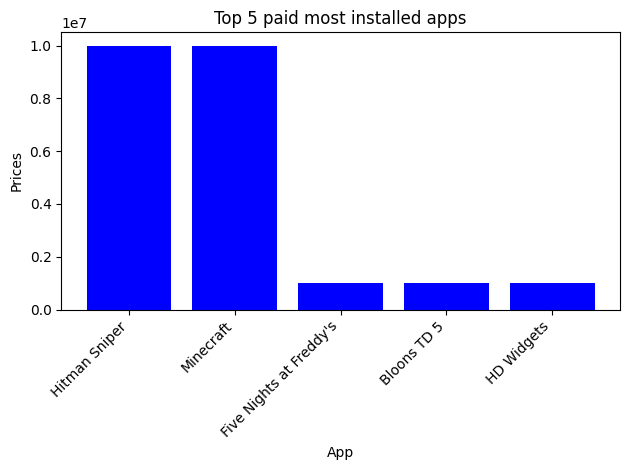

In [51]:
#top 5 paid apps
sorted_paid_apps = df1.sort_values(by='Installs_Count', ascending=False).head(5)

plt.bar(sorted_paid_apps['App'], sorted_paid_apps['Installs_Count'], color='blue')
plt.xlabel('App')
plt.ylabel('Prices')
plt.title('Top 5 paid most installed apps')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

**What are the top 5 most installed Free Applications?**

In [52]:
#sorting apps based on "free" type
df2 = playstore_df[playstore_df['Type'] == 'Free']

#showing top 5 most installed free apps
result=df2.sort_values(by=['Installs_Count'], ascending=False).head(5)
result

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Count,Clean_Reviews,Price_Updated
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1.000000e+09,56642847.0,0.0
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,"1,000,000,000+",Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,1.000000e+09,1433233.0,0.0
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,1.000000e+09,25655305.0,0.0
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1.000000e+09,10484169.0,0.0
3234,Google,TOOLS,4.4,8033493,Varies with device,"1,000,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,1.000000e+09,8033493.0,0.0


In [53]:
print(f'Top 5 free most installed applications are :\n', ','.join(result['App']))

Top 5 free most installed applications are :
 Messenger – Text and Video Chat for Free,Google Play Books,YouTube,Skype - free IM & video calls,Google


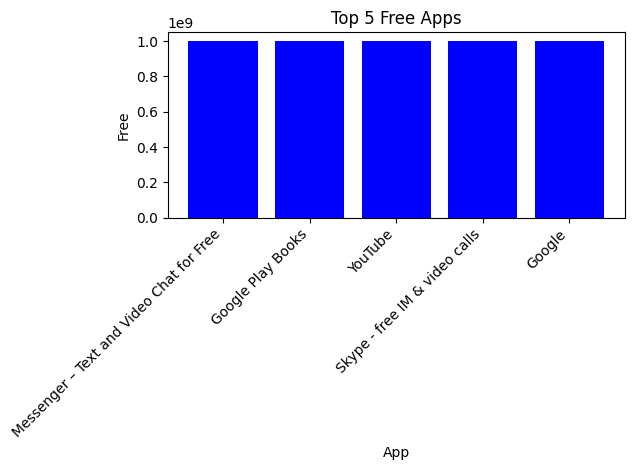

In [54]:
sorted_free_apps = df2.sort_values(by='Installs_Count', ascending=False).head(5)

plt.bar(sorted_free_apps['App'], sorted_free_apps['Installs_Count'], color='blue')
plt.xlabel('App')
plt.ylabel('Free')
plt.title('Top 5 Free Apps')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

**What are the top 3 most installed application category?**

In [55]:
#sorting most installed category of apps
df3 = playstore_df.sort_values(by=['Installs_Count'], ascending=False)

#showing top 3 most installed category of apps
Top_3_Installs=df3.head(3)["Category"]
print(Top_3_Installs)

336           COMMUNICATION
152     BOOKS_AND_REFERENCE
1654                   GAME
Name: Category, dtype: object


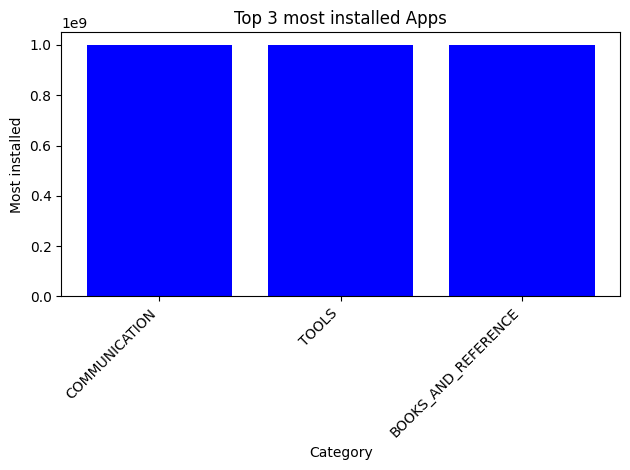

In [56]:
Top_3_Installs = df3.sort_values(by='Installs_Count', ascending=False).head(3)

plt.bar(Top_3_Installs['Category'], Top_3_Installs['Installs_Count'], color='blue')
plt.xlabel('Category')
plt.ylabel('Most installed')
plt.title('Top 3 most installed Apps')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

**What are the 5 most expensive applications?**

In [57]:
#sorting apps based on price
df4 = playstore_df.sort_values(by=['Price'], ascending=False)
#showing top 5 most expensive apps
df4.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Count,Clean_Reviews,Price_Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.000000,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,0.0,3000000.0,0.0
7313,BF CG View Wallpapers,FAMILY,3.600000,13,2.5M,"1,000+",Free,0,Teen,Entertainment,"June 19, 2015",3.0,3.0 and up,1000.0,13.0,0.0
7340,Calvary.ch App,LIFESTYLE,4.400000,10,7.7M,500+,Free,0,Teen,Lifestyle,"June 25, 2018",3.8.0,4.1 and up,500.0,10.0,0.0
7341,autolina.ch has over 120'000 cars on offer.,AUTO_AND_VEHICLES,4.200000,25,6.5M,"10,000+",Free,0,Everyone,Auto & Vehicles,"August 2, 2017",1.02,4.2 and up,10000.0,25.0,0.0
7343,Digi-TV.ch,SOCIAL,4.193338,62,25M,"10,000+",Free,0,Teen,Social,"May 3, 2018",7.1.29,4.2 and up,10000.0,62.0,0.0


In [58]:
print(f'The top 5 most expensive apps are:\n {", ".join(df4["App"].head(5))}')

The top 5 most expensive apps are:
 Life Made WI-Fi Touchscreen Photo Frame, BF CG View Wallpapers, Calvary.ch App, autolina.ch has over 120'000 cars on offer., Digi-TV.ch


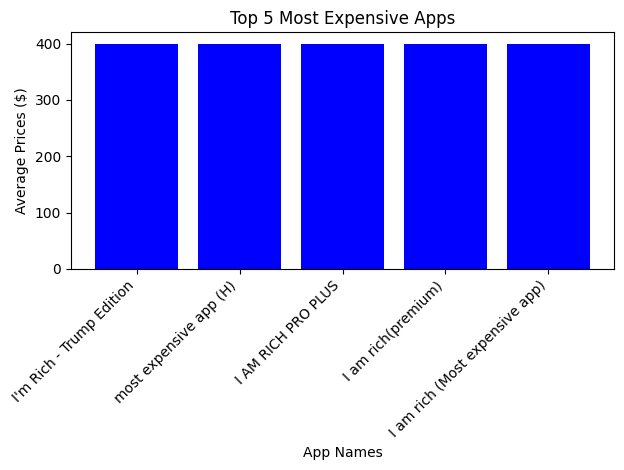

In [59]:
df4 = pd.DataFrame(playstore_df)

# Remove the dollar sign and convert 'Price' to numeric
df4['Price'] = pd.to_numeric(df4['Price'].replace('[\$,]', '', regex=True), errors='coerce')

# Group by 'App' and calculate the mean of 'Price', then sort by mean in descending order
top_5_most_expensive_app = df4.groupby('App')['Price'].mean().sort_values(ascending=False).head(5)

# Create a bar plot
plt.bar(top_5_most_expensive_app.index, top_5_most_expensive_app.values, color='blue')
plt.xlabel('App Names')
plt.ylabel('Average Prices ($)')
plt.title('Top 5 Most Expensive Apps')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

#CONCLUSION

By analyzing the data closely, we have inferred a few of the observations.

•	Google PlayStore has 2 types of applications, mainly Free and Paid.

•	There are various categories amongst which there are multiple applications- Three major apps are Family, Tools and Games.

•	Applications receive both Ratings and Reviews and can be respectively graded too.

•	Applications are installed by various users and mostly installed applications can be found, along with the information of their category, rating, type etc.

•	Business, Game, Family and Tools have the highest number of applications.

•	Free applications make 98% of the total of Applications, with a total count of more than 8000.

•	Communication, Games and Tools are the most installed Application category.

•	Most of the apps with higher rating range of 4.0-4.7 are having high amount of reviews and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high

•	Install Counts and Reviews are the most correlated and influence a lot of the downloads

Thus a lot of factors play an important role in the user usage and popularity of any application. It can be because of the price of the application, based of the rating and reviews, also because of the number of installs, which in turn also affects the decision making of any app.

